# Group By

In [1]:
import pandas as pd
import numpy as np
# 加上这一句，能在jupyter notebook展示matplot图表
%matplotlib inline

In [2]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.489008,1.678604
1,bar,one,0.185849,0.783878
2,foo,two,-0.689049,-1.139226
3,bar,three,1.038400,0.609792
4,foo,two,-0.470899,1.443043
5,bar,two,0.070883,0.383588
6,foo,one,0.960408,1.009852
7,foo,three,-0.850006,0.009350


In [3]:
df.groupby('A').sum()

,C,D
A,,
bar,1.295133,1.777259
foo,0.439461,3.001624


In [4]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.185849  0.783878
    three  1.038400  0.609792
    two    0.070883  0.383588
foo one    1.224708  1.344228
    three -0.850006  0.009350
    two   -0.579974  0.151909

In [5]:
df.groupby(['A','B'], as_index=False).mean()

,A,B,C,D
0,bar,one,0.185849,0.783878
1,bar,three,1.038400,0.609792
2,bar,two,0.070883,0.383588
3,foo,one,1.224708,1.344228
4,foo,three,-0.850006,0.009350
5,foo,two,-0.579974,0.151909


In [6]:
df.groupby('A').agg([np.sum, np.mean, np.std])

C                             D                   
          sum      mean       std       sum      mean      std
A                                                             
bar  1.295133  0.431711  0.528544  1.777259  0.592420  0.20071
foo  0.439461  0.087892  1.063008  3.001624  0.600325  1.16360

In [7]:
# 方法1：预过滤，性能更好
df.groupby('A')['C'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,1.295133,0.431711,0.528544
foo,0.439461,0.087892,1.063008


In [8]:
# 方法2
df.groupby('A').agg([np.sum, np.mean, np.std])['C']

,sum,mean,std
A,,,
bar,1.295133,0.431711,0.528544
foo,0.439461,0.087892,1.063008


In [9]:
df.groupby('A').agg({"C":np.sum, "D":np.mean})

,C,D
A,,
bar,1.295133,0.592420
foo,0.439461,0.600325


## Groupby Principle

In [10]:
g = df.groupby('A')
g

In [11]:
for name,group in g:
    print(name)
    print(group)
    print()

bar
     A      B         C         D
1  bar    one  0.185849  0.783878
3  bar  three  1.038400  0.609792
5  bar    two  0.070883  0.383588

foo
     A      B         C         D
0  foo    one  1.489008  1.678604
2  foo    two -0.689049 -1.139226
4  foo    two -0.470899  1.443043
6  foo    one  0.960408  1.009852
7  foo  three -0.850006  0.009350



In [12]:
g.get_group('bar')

,A,B,C,D
1,bar,one,0.185849,0.783878
3,bar,three,1.038400,0.609792
5,bar,two,0.070883,0.383588


In [13]:
g = df.groupby(['A', 'B'])

In [14]:
for name,group in g:
    print(name)
    print(group)
    print()

('bar', 'one')
     A    B         C         D
1  bar  one  0.185849  0.783878

('bar', 'three')
     A      B       C         D
3  bar  three  1.0384  0.609792

('bar', 'two')
     A    B         C         D
5  bar  two  0.070883  0.383588

('foo', 'one')
     A    B         C         D
0  foo  one  1.489008  1.678604
6  foo  one  0.960408  1.009852

('foo', 'three')
     A      B         C        D
7  foo  three -0.850006  0.00935

('foo', 'two')
     A    B         C         D
2  foo  two -0.689049 -1.139226
4  foo  two -0.470899  1.443043



In [15]:
g.get_group(('foo', 'one'))

,A,B,C,D
0,foo,one,1.489008,1.678604
6,foo,one,0.960408,1.009852


In [16]:
g['C']

In [17]:
for name, group in g['C']:
    print(name)
    print(group)
    print(type(group))
    print()

('bar', 'one')
1    0.185849
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('bar', 'three')
3    1.0384
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('bar', 'two')
5    0.070883
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('foo', 'one')
0    1.489008
6    0.960408
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('foo', 'three')
7   -0.850006
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('foo', 'two')
2   -0.689049
4   -0.470899
Name: C, dtype: float64
<class 'pandas.core.series.Series'>



## Examples

In [18]:
fpath = 'datas/beijing_tianqi/beijing_tianqi_2018.csv'
df = pd.read_csv(fpath)
# 替换掉温度的后缀℃
df.loc[:, "bWendu"] = df["bWendu"].str.replace("℃", "").astype('int32')
df.loc[:, "yWendu"] = df["yWendu"].str.replace("℃", "").astype('int32')
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


In [19]:
df['month'] = df['ymd'].str[:7]
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,month
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,2018-01
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,2018-01
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,2018-01
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,2018-01
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,2018-01


In [20]:
data = df.groupby('month')['bWendu'].max()
data

month
2018-01     7
2018-02    12
2018-03    27
2018-04    30
2018-05    35
2018-06    38
2018-07    37
2018-08    36
2018-09    31
2018-10    25
2018-11    18
2018-12    10
Name: bWendu, dtype: int32

In [21]:
type(data)

pandas.core.series.Series

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='month'>

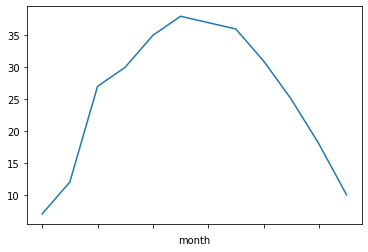

In [22]:
data.plot()

In [23]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,month
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,2018-01
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,2018-01
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,2018-01
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,2018-01
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,2018-01


In [24]:
group_data = df.groupby('month').agg({"bWendu":np.max, "yWendu":np.min, "aqi":np.mean})
group_data

,bWendu,yWendu,aqi
month,,,
2018-01,7,-12,60.677419
2018-02,12,-10,78.857143
2018-03,27,-4,130.322581
2018-04,30,1,102.866667
2018-05,35,10,99.064516
2018-06,38,17,82.300000
2018-07,37,22,72.677419
2018-08,36,20,59.516129
2018-09,31,11,50.433333


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='month'>

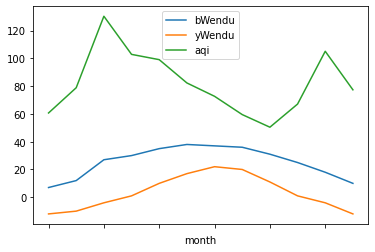

In [25]:
group_data.plot()